# Baseline Model (Non-Repeat Donors)

### Imports

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

from config import DATA_DIR

### Preprocessing

In [10]:
# Load dataset_non_repeat.csv as a pandas dataframe
df = pd.read_csv(os.path.join(DATA_DIR, 'dataset_non_repeat.csv'))

# Drop columns
df = df.drop(['transaction.id', 'date', 'bonica.cid', 'bonica.rid', 'repeat_donor', 'adjusted_amount', 'recipient.name'], axis=1)

print(df.shape)
print(df['cycle'].max())
df.head()

(24708, 83)
1998


/var/folders/vt/kcrf6dkn1t91ywvswkws125c0000gn/T/ipykernel_80905/1545277390.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, 'dataset_non_repeat.csv'))


,cycle,amount,contributor.zipcode,recipient.party,recipient.type,recipient.state,seat,election.type,latitude,longitude,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
0,1980,500.0,14224,100,CAND,NY,federal:house,G,42.837490,-78.750832,...,0,0,0,0,0,0,0,0,0,0
1,1980,1000.0,77027,100,CAND,LA,federal:senate,P,29.740080,-95.446411,...,0,1,0,0,0,0,0,0,0,0
2,1980,500.0,70806,100,CAND,LA,federal:senate,P,30.474125,-91.110931,...,0,0,0,0,0,0,0,0,0,0
3,1980,250.0,70005,100,CAND,LA,federal:senate,P,29.998821,-90.134430,...,0,0,0,0,0,0,0,0,0,0
4,1980,1000.0,71106,100,CAND,LA,federal:senate,P,32.391171,-93.711609,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Set the target variable to be the amount of the donation
y = df['amount']

# Set the features to be the rest of the columns
X = df.drop('amount', axis=1)

# Converting categorical variables to dummy variables
X = pd.get_dummies(X)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Print the shapes of the training and testing sets
print(X_train_imputed.shape, X_test_imputed.shape, y_train.shape, y_test.shape)


(19766, 190) (4942, 190) (19766,) (4942,)


### Modeling

In [6]:
# Initialize the Lasso Regression model 
lasso = Lasso(alpha=0.01, random_state=109) 

# Train the model
lasso.fit(X_train_imputed, y_train)


/Users/alextonelli/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e+09, tolerance: 1.340e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, random_state=109)

In [17]:
# Predict on the test data
y_pred = lasso.predict(X_test_imputed)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error of Baseline Model:', mae)

# Compare MAE of model to MAE of a model that predicts the mean of the response variable
mean = np.mean(y_train)
y_pred_mean = np.full(y_test.shape, mean)
mae_baseline = mean_absolute_error(y_test, y_pred_mean)
print('Mean Absolute Error of Naive Model:', mae_baseline)


Mean Absolute Error of Baseline Model: 225.2998804419851
Mean Absolute Error of Naive Model: 318.0841786348682


### Visualizations

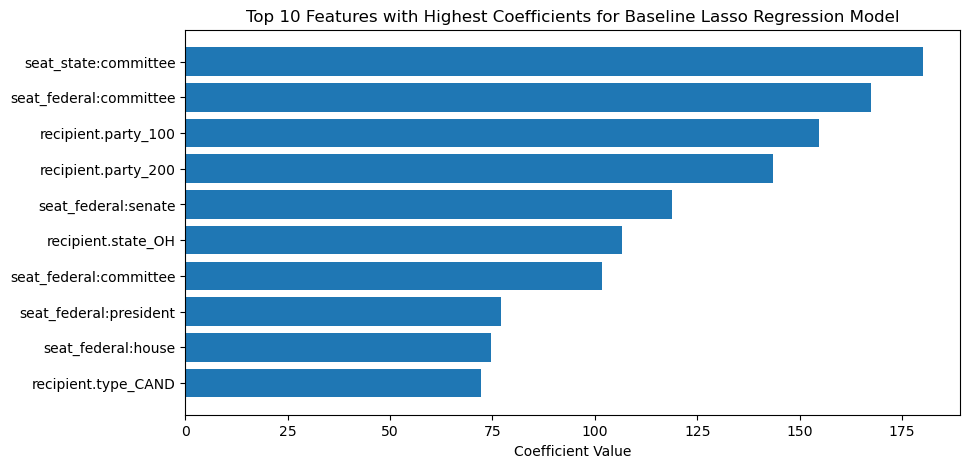

In [16]:
# Visualize the top n features with the highest coefficients
n = 10
features = X.columns
importances = lasso.coef_
indices = np.argsort(importances)[-n:]
plt.figure(figsize=(10, 5))
plt.title(f'Top {n} Features with Highest Coefficients for Baseline Lasso Regression Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()



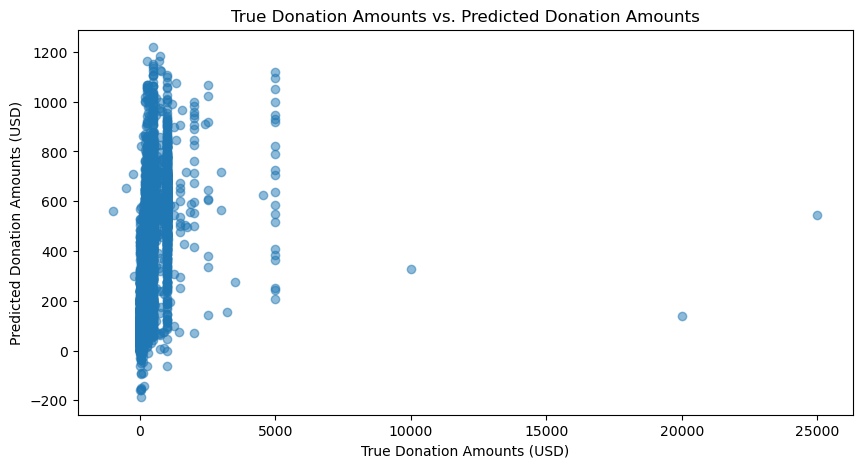

In [19]:
# Plot the predicted values against the true values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Donation Amounts (USD)')
plt.ylabel('Predicted Donation Amounts (USD)')
plt.title('True Donation Amounts vs. Predicted Donation Amounts')
plt.show()